In [1]:
# Modify this according to the path in your computer
main_dir = 'My Drive/Research/2022_FloodsEPA/Results/'

In [2]:
! pip install cpi

# Import needed packages
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats as sts
from scipy.stats import ttest_ind
from numpy.random import default_rng
from plotnine import *
import time
import pandas as pd
import cpi
import plotly.express as px

theReferenceYear = 2020
theAMI = cpi.inflate(136837,2021,2020) # San Mateo, vs 96349 in EPA
rng = default_rng(13)

vir1 = '#440154FF'
vir2 = '#3B528BFF'
vir3 = '#21908CFF'
vir4 = '#5DC863FF'
vir5 = '#FED725FF'

print(px.colors.sequential.Agsunset)
color_sunset_0 = '#4c2991'
color_sunset_1 = '#f6aa7a'
color_sunset_2 = '#fa7876'

['rgb(75, 41, 145)', 'rgb(135, 44, 162)', 'rgb(192, 54, 157)', 'rgb(234, 79, 136)', 'rgb(250, 120, 118)', 'rgb(246, 169, 122)', 'rgb(237, 217, 163)']


/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_23799/1616642814.py:15: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.


# Top

In [ ]:
df_blds = pd.read_csv(main_dir + 'Buildings.txt',header=0)
df_blds['MortgageEnd'] = df_blds['Mortgage_Date'] + df_blds['Mortgage_Maturity']
df_blds['IncomeTag'] = df_blds['OwnerIncomeToday'].apply(lambda x: 'Very low' if x < 0.5 * theAMI else ('Low' if x < 0.8 * theAMI else ('Moderate' if x < 1.2 * theAMI else 'High')))
df_blds['MortgageTag'] = df_blds['MortgageEnd'].apply(lambda x: 'None' if x - theReferenceYear <= 0  else ('<10' if x -theReferenceYear < 10  else ('<20' if x -theReferenceYear < 20 else '>20')))
df_blds['Equity'] = np.minimum(0.2 + 0.8 * (theReferenceYear - df_blds['Mortgage_Date']) / df_blds['Mortgage_Maturity'],1) * df_blds['HomeValue']
df_blds.head(2)

,Latitude,Longitude,FloodPlain,Mortgage_Date,Mortgage_Maturity,HomeValue,OwnerIncomeToday,MortgageEnd,IncomeTag,MortgageTag,Equity
0,37.474263,-122.153298,Yes,2008,30,377565.570382,175012.968839,2038,High,<20,196334.096599
1,37.474234,-122.153097,Yes,2012,30,223821.548847,39760.901335,2042,Very low,>20,92512.906857


# Generational impact




---



---



In [ ]:
df_realestate = pd.read_csv(main_dir + 'RealEstate.csv',header=None).multiply(cpi.inflate(1,2017,to=theReferenceYear))
df_realestate.columns = ['S'+str(i) for i in range(df_realestate.shape[1])]
df_realestate

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S990,S991,S992,S993,S994,S995,S996,S997,S998,S999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 20-year return period storms

In [ ]:
df_debt_2020_20_ND = pd.read_csv(main_dir + 'df_Debt_2020_20_ND.txt',index_col=None)
df_debt_2020_20_DD = pd.read_csv(main_dir + 'df_Debt_2020_20_DD.txt',index_col=None)
df_debt_2020_20_CD = pd.read_csv(main_dir + 'df_Debt_2020_20_CD.txt',index_col=None)

df_debt_2050_20_ND = pd.read_csv(main_dir + 'df_Debt_2050_20_ND.txt',index_col=None)
df_debt_2050_20_DD = pd.read_csv(main_dir + 'df_Debt_2050_20_DD.txt',index_col=None)
df_debt_2050_20_CD = pd.read_csv(main_dir + 'df_Debt_2050_20_CD.txt',index_col=None)

In [ ]:
def getGenerationImpact(nyears = 30, nrep = 50):

    df_PD_Effect = pd.DataFrame()
    colnames = df_debt_2020_20_ND.columns
    df_futures_ND = pd.DataFrame(columns=['R'+str(i) for i in range(nrep)])
    df_futures_DD = pd.DataFrame(columns=['R'+str(i) for i in range(nrep)])
    df_futures_CD = pd.DataFrame(columns=['R'+str(i) for i in range(nrep)])

    # Create nrep potential outcomes for year n
    for r in range(nrep):
        # Randomly select one flood map #
        col = rng.choice(a=colnames)
        df_debts_ND = pd.DataFrame(columns=['S'+str(i) for i in range(nyears)])
        df_debts_DD = pd.DataFrame(columns=['S'+str(i) for i in range(nyears)])
        df_debts_CD = pd.DataFrame(columns=['S'+str(i) for i in range(nyears)])

        for n in range(nyears):

            # Check if there was a storm this year
            if rng.random() < 0.05:

                # Determine if the flood map of number # will be picked between those with SLR or not
                theSLRFlag = 1 if rng.random() < n/nyears else 0

                # If from the SLR maps
                if theSLRFlag == 1:
                    df_debts_ND['S'+str(n)] = df_debt_2050_20_ND[col]
                    df_debts_DD['S'+str(n)] = df_debt_2050_20_DD[col]
                    df_debts_CD['S'+str(n)] = df_debt_2050_20_CD[col]

                # If not from SLR maps
                else:
                    df_debts_ND['S'+str(n)] = df_debt_2020_20_ND[col]
                    df_debts_DD['S'+str(n)] = df_debt_2020_20_DD[col]
                    df_debts_CD['S'+str(n)] = df_debt_2020_20_CD[col]

            else:
                df_debts_ND['S'+str(n)] = [0] * df_debt_2020_20_ND.shape[0]
                df_debts_DD['S'+str(n)] = [0] * df_debt_2020_20_ND.shape[0]
                df_debts_CD['S'+str(n)] = [0] * df_debt_2020_20_ND.shape[0]

        # set the mean from nrep outcomes for year n as the estimated debt for year n
        df_futures_ND['R'+str(r)] = df_debts_ND.sum(axis=1)
        df_futures_DD['R'+str(r)] = df_debts_DD.sum(axis=1)
        df_futures_CD['R'+str(r)] = df_debts_CD.sum(axis=1)


    return df_futures_ND, df_futures_DD, df_futures_CD


def getExceedanceCurves(df_futures,nrep=1):
    df_futures['Tag'] = df_blds['IncomeTag']
    df_futures['Tag'] = pd.Categorical(df_futures['Tag'] ,
                          categories=['Very low','Low','Moderate','High'],
                          ordered=True)
    df_futures_grp = df_futures.replace(0,np.nan).groupby(by='Tag').mean().reset_index()


    df_plot = pd.DataFrame()
    df_plot['Threshold'] = list(range(0,30000,500))
    df_plot['Very low'] = [0] * df_plot.shape[0]
    df_plot['Low'] = [0] * df_plot.shape[0]
    df_plot['Moderate'] = [0] * df_plot.shape[0]
    df_plot['High'] = [0] * df_plot.shape[0]


    for i in range(df_plot.shape[0]):
        df_plot.loc[i,'Very low'] = np.sum(df_futures_grp[df_futures_grp['Tag'] == 'Very low'].reset_index().loc[:,'R0':'R'+str(nrep-1)].transpose() > df_plot.loc[i,'Threshold'],axis=0).iloc[0]/nrep
        df_plot.loc[i,'Low'] = np.sum(df_futures_grp[df_futures_grp['Tag'] == 'Low'].reset_index().loc[:,'R0':'R'+str(nrep-1)].transpose() > df_plot.loc[i,'Threshold'],axis=0).iloc[0]/nrep
        df_plot.loc[i,'Moderate'] = np.sum(df_futures_grp[df_futures_grp['Tag'] == 'Moderate'].reset_index().loc[:,'R0':'R'+str(nrep-1)].transpose() > df_plot.loc[i,'Threshold'],axis=0).iloc[0]/nrep
        df_plot.loc[i,'High'] = np.sum(df_futures_grp[df_futures_grp['Tag'] == 'High'].reset_index().loc[:,'R0':'R'+str(nrep-1)].transpose() > df_plot.loc[i,'Threshold'],axis=0).iloc[0]/nrep

    return df_plot

In [ ]:
nrep = 10000
df_futures_ND_20, df_futures_DD_20, df_futures_CD_20 = getGenerationImpact(nyears = 31, nrep = nrep)
df_20_ND = getExceedanceCurves(df_futures_ND_20, nrep = nrep)
df_20_DD = getExceedanceCurves(df_futures_DD_20, nrep = nrep)
df_20_CD = getExceedanceCurves(df_futures_CD_20, nrep = nrep)
df_20_ND.to_csv(main_dir + 'df_Exceedance_20_ND.txt', index=False)
df_20_DD.to_csv(main_dir + 'df_Exceedance_20_DD.txt', index=False)
df_20_CD.to_csv(main_dir + 'df_Exceedance_20_CD.txt', index=False)

/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/2014594887.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/2014594887.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/2014594887.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.793' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/var/folders/lh

/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: My Drive/Research/2022_FloodsEPA/Results/Fig_Exceedance_20_ND.pdf
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


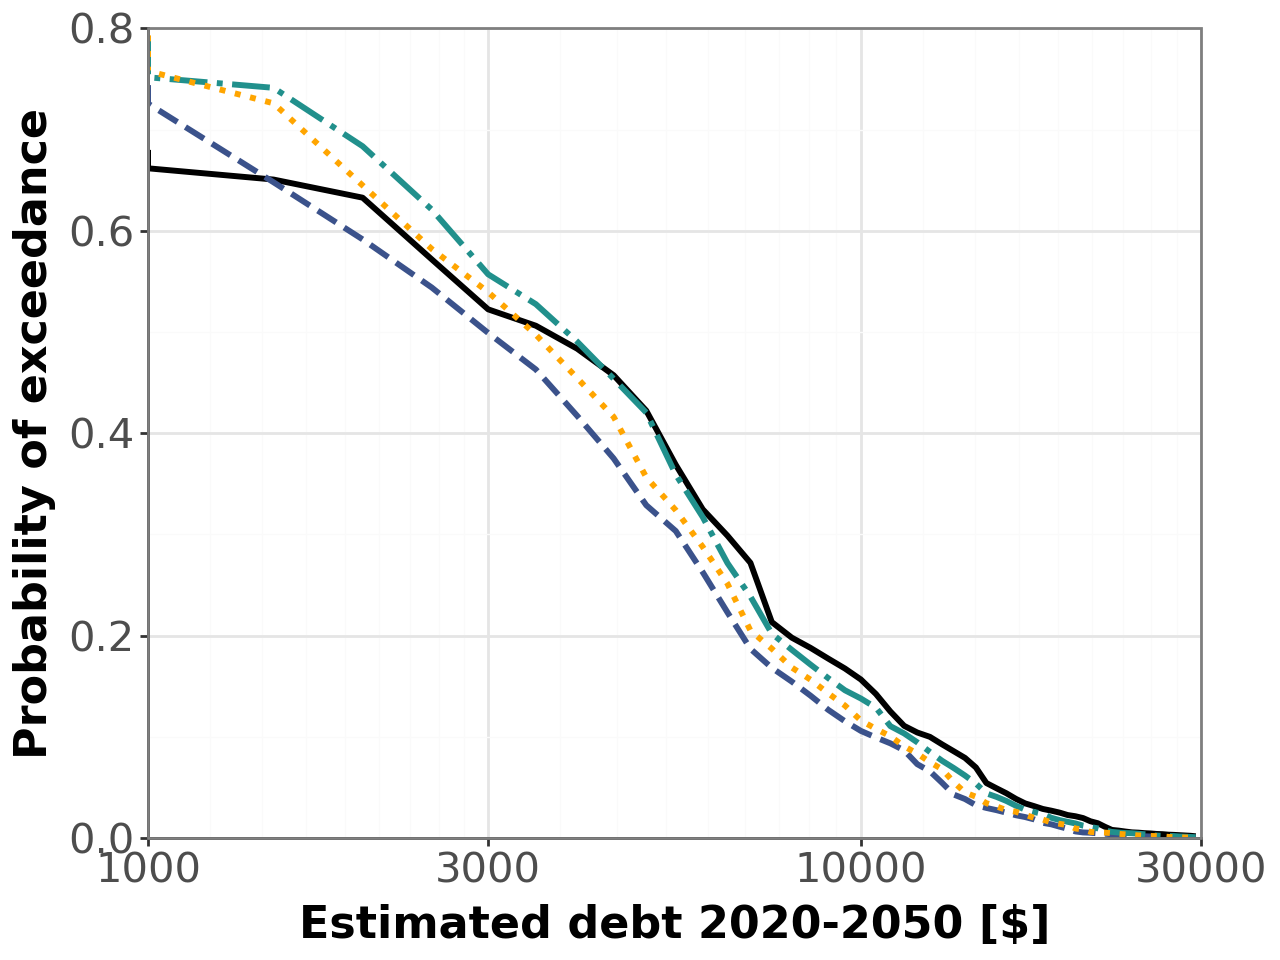

In [ ]:
df_20 = pd.DataFrame()
df_20['Threshold'] = df_20_ND['Threshold']
df_20['Very low'] = df_20_ND['Very low']
df_20['Low'] = df_20_ND['Low']
df_20['Moderate'] = df_20_ND['Moderate']
df_20['High'] = df_20_ND['High']

df_20_long = pd.melt(df_20,id_vars=['Threshold'])

plot_base = ggplot(df_20_long,aes(x='Threshold',y='value',color='variable',linetype='variable')) + geom_line(size=1.2)
plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(color=False,linetype=False)+\
            scale_color_manual(values=['black',vir2,vir3,'orange']) +\
            scale_y_continuous(name = 'Probability of exceedance',limits=[0,0.8], expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[1000,30000], expand=[0,0])

ggsave(plot_clean, filename = 'Fig_Exceedance_20_ND.pdf', path = main_dir)

plot_clean

/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: My Drive/Research/2022_FloodsEPA/Results/Fig_Exceedance_20_DD.pdf
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


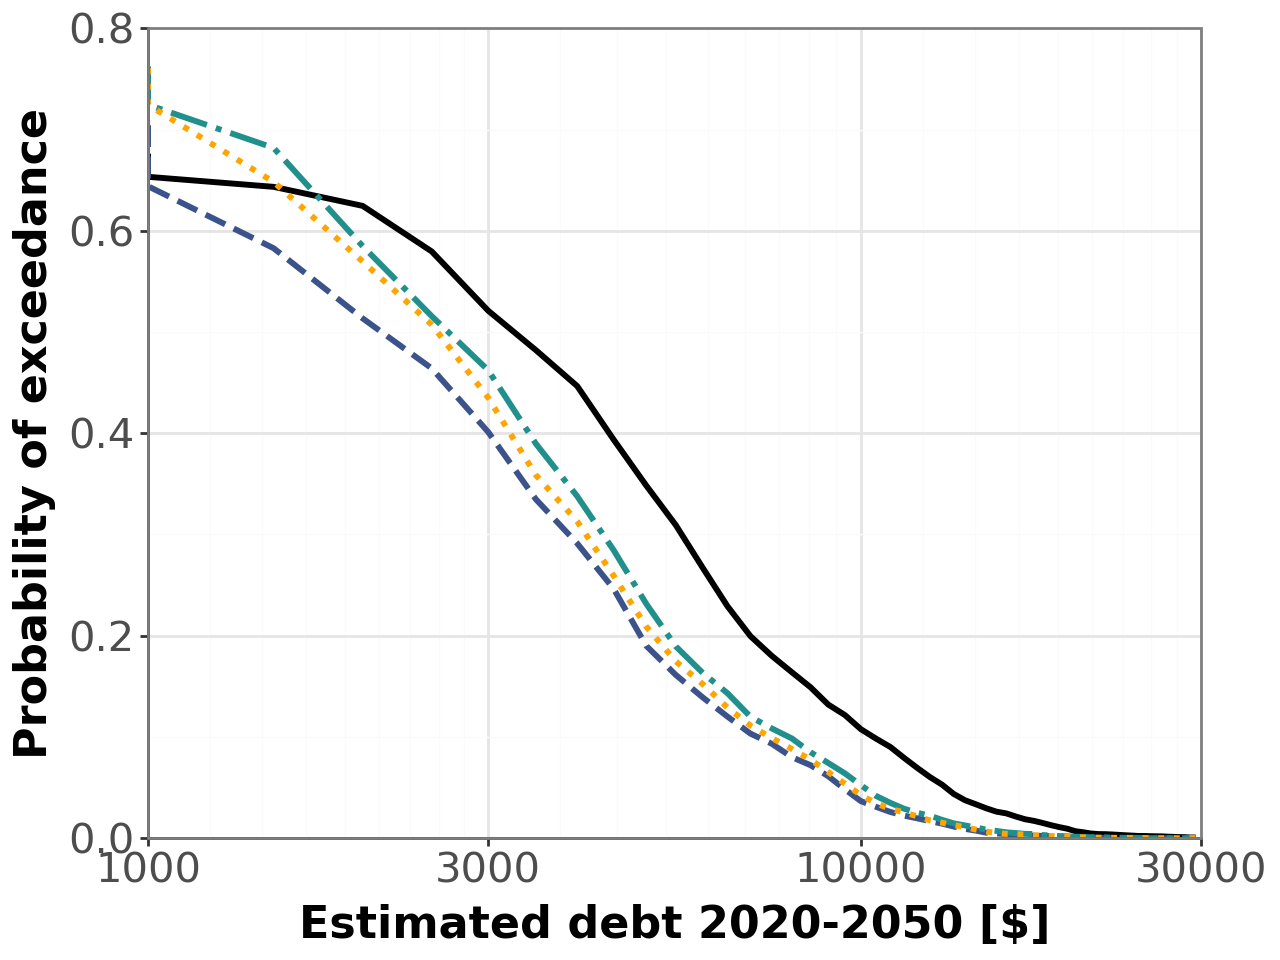

In [ ]:
df_20 = pd.DataFrame()
df_20['Threshold'] = df_20_DD['Threshold']
df_20['Very low'] = df_20_DD['Very low']
df_20['Low'] = df_20_DD['Low']
df_20['Moderate'] = df_20_DD['Moderate']
df_20['High'] = df_20_DD['High']

df_20_long = pd.melt(df_20,id_vars=['Threshold'])

plot_base = ggplot(df_20_long,aes(x='Threshold',y='value',color='variable',linetype='variable')) + geom_line(size=1.2)
plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(color=False,linetype=False)+\
            guides(color=False,linetype=False)+\
            scale_color_manual(values=['black',vir2,vir3,'orange']) +\
            scale_y_continuous(name = 'Probability of exceedance',limits=[0,0.8], expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[1000,30000], expand=[0,0])

ggsave(plot_clean, filename = 'Fig_Exceedance_20_DD.pdf', path = main_dir)

plot_clean

/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: My Drive/Research/2022_FloodsEPA/Results/Fig_Exceedance_20_CD.pdf
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


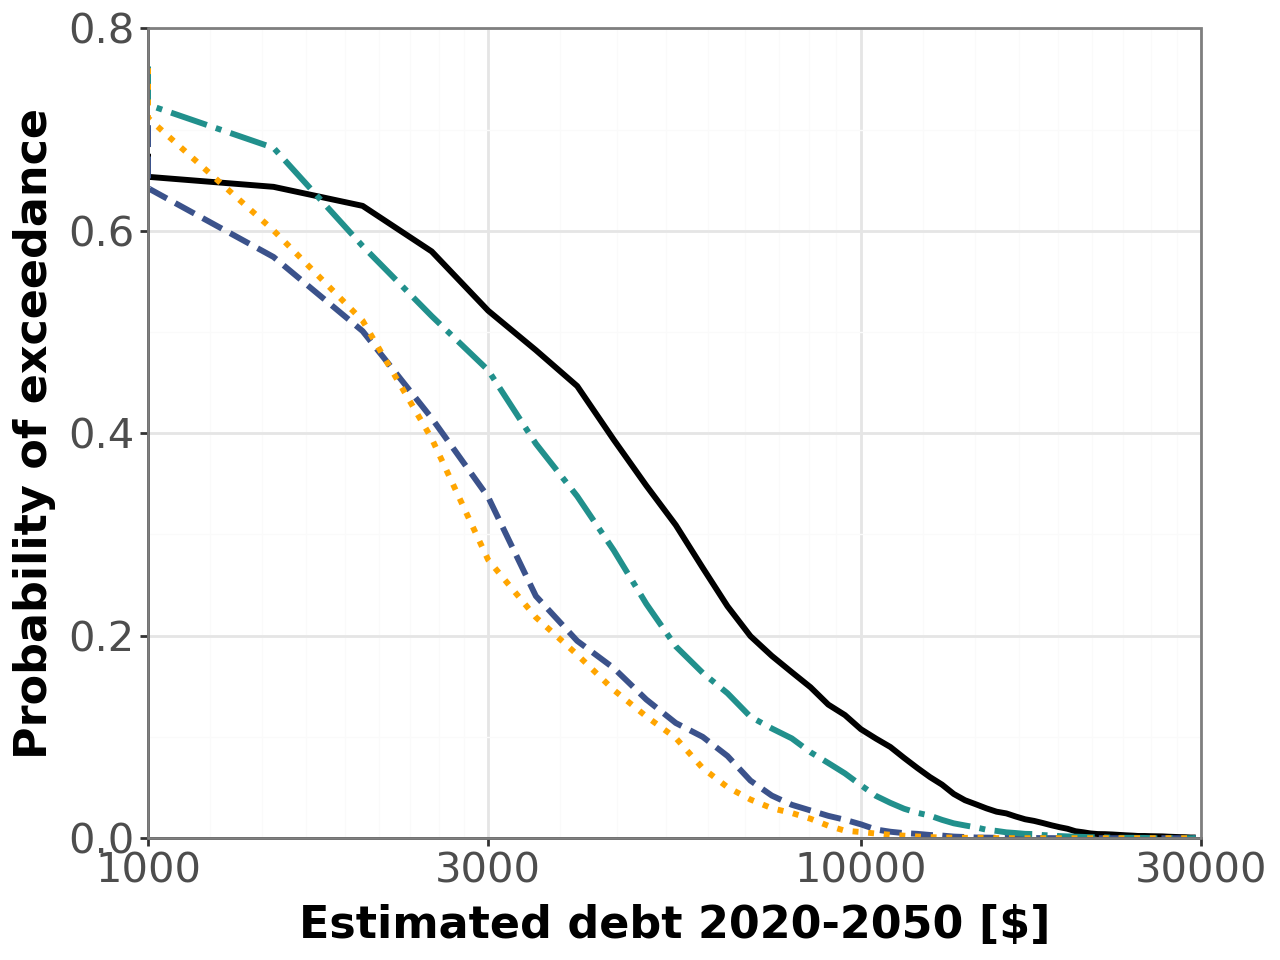

In [ ]:
df_20 = pd.DataFrame()
df_20['Threshold'] = df_20_CD['Threshold']
df_20['Very low'] = df_20_CD['Very low']
df_20['Low'] = df_20_CD['Low']
df_20['Moderate'] = df_20_CD['Moderate']
df_20['High'] = df_20_CD['High']

df_20_long = pd.melt(df_20,id_vars=['Threshold'])

plot_base = ggplot(df_20_long,aes(x='Threshold',y='value',color='variable',linetype='variable')) + geom_line(size=1.2)
plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle = 0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(color=False,linetype=False)+\
            scale_color_manual(values=['black',vir2,vir3,'orange']) +\
            scale_y_continuous(name = 'Probability of exceedance',limits=[0,0.8], expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[1000,30000], expand=[0,0])

ggsave(plot_clean, filename = 'Fig_Exceedance_20_CD.pdf', path = main_dir)

plot_clean



---



---



# 100-year return period storms

In [ ]:
df_debt_2020_100_ND = pd.read_csv(main_dir + 'df_Debt_2020_100_ND.txt',index_col=None)
df_debt_2020_100_DD = pd.read_csv(main_dir + 'df_Debt_2020_100_DD.txt',index_col=None)
df_debt_2020_100_CD = pd.read_csv(main_dir + 'df_Debt_2020_100_CD.txt',index_col=None)

df_debt_2050_100_ND = pd.read_csv(main_dir + 'df_Debt_2050_100_2_ND.txt',index_col=None)
df_debt_2050_100_DD = pd.read_csv(main_dir + 'df_Debt_2050_100_2_DD.txt',index_col=None)
df_debt_2050_100_CD = pd.read_csv(main_dir + 'df_Debt_2050_100_2_CD.txt',index_col=None)

In [ ]:
def getGenerationImpact(nyears = 30, nrep = 50):

    colnames = df_debt_2020_100_ND.columns
    df_futures_ND = pd.DataFrame(columns=['R'+str(i) for i in range(nrep)])
    df_futures_DD = pd.DataFrame(columns=['R'+str(i) for i in range(nrep)])
    df_futures_CD = pd.DataFrame(columns=['R'+str(i) for i in range(nrep)])

    # Create nrep potential outcomes for year n
    for r in range(nrep):

        # Randomly select one flood map #
        col = rng.choice(a=colnames)
        df_debts_ND = pd.DataFrame(columns=['S'+str(i) for i in range(nyears)])
        df_debts_DD = pd.DataFrame(columns=['S'+str(i) for i in range(nyears)])
        df_debts_CD = pd.DataFrame(columns=['S'+str(i) for i in range(nyears)])

        for n in range(nyears):

            # Check if there was a storm this year
            if rng.random() < 0.01:

                # Determine if the flood map of number # will be picked between those with SLR or not
                theSLRFlag = 1 if rng.random() < n/nyears else 0

                # If from the SLR maps
                if theSLRFlag == 1:
                    df_debts_ND['S'+str(n)] = df_debt_2050_100_ND[col]
                    df_debts_DD['S'+str(n)] = df_debt_2050_100_DD[col]
                    df_debts_CD['S'+str(n)] = df_debt_2050_100_CD[col]

                # If not from SLR maps
                else:
                    df_debts_ND['S'+str(n)] = df_debt_2020_100_ND[col]
                    df_debts_DD['S'+str(n)] = df_debt_2020_100_DD[col]
                    df_debts_CD['S'+str(n)] = df_debt_2020_100_CD[col]

            else:
                df_debts_ND['S'+str(n)] = [0] * df_debt_2020_100_ND.shape[0]
                df_debts_DD['S'+str(n)] = [0] * df_debt_2020_100_ND.shape[0]
                df_debts_CD['S'+str(n)] = [0] * df_debt_2020_100_ND.shape[0]


        # set the mean from nrep outcomes for year n as the estimated debt for year n
        df_futures_ND['R'+str(r)] = df_debts_ND.sum(axis=1)
        df_futures_DD['R'+str(r)] = df_debts_DD.sum(axis=1)
        df_futures_CD['R'+str(r)] = df_debts_CD.sum(axis=1)

    return df_futures_ND, df_futures_DD, df_futures_CD


def getExceedanceCurves(df_futures,nrep=1):
    df_futures['Tag'] = df_blds['IncomeTag']
    df_futures['Tag'] = pd.Categorical(df_futures['Tag'] ,
                          categories=['Very low','Low','Moderate','High'],
                          ordered=True)
    df_futures_grp = df_futures.replace(0,np.nan).groupby(by='Tag').mean().reset_index()


    df_plot = pd.DataFrame()
    df_plot['Threshold'] = list(range(0,30000,500))
    df_plot['Very low'] = [0] * df_plot.shape[0]
    df_plot['Low'] = [0] * df_plot.shape[0]
    df_plot['Moderate'] = [0] * df_plot.shape[0]
    df_plot['High'] = [0] * df_plot.shape[0]


    for i in range(df_plot.shape[0]):
        df_plot.loc[i,'Very low'] = np.sum(df_futures_grp[df_futures_grp['Tag'] == 'Very low'].reset_index().loc[:,'R0':'R'+str(nrep-1)].transpose() > df_plot.loc[i,'Threshold'],axis=0).iloc[0]/nrep
        df_plot.loc[i,'Low'] = np.sum(df_futures_grp[df_futures_grp['Tag'] == 'Low'].reset_index().loc[:,'R0':'R'+str(nrep-1)].transpose() > df_plot.loc[i,'Threshold'],axis=0).iloc[0]/nrep
        df_plot.loc[i,'Moderate'] = np.sum(df_futures_grp[df_futures_grp['Tag'] == 'Moderate'].reset_index().loc[:,'R0':'R'+str(nrep-1)].transpose() > df_plot.loc[i,'Threshold'],axis=0).iloc[0]/nrep
        df_plot.loc[i,'High'] = np.sum(df_futures_grp[df_futures_grp['Tag'] == 'High'].reset_index().loc[:,'R0':'R'+str(nrep-1)].transpose() > df_plot.loc[i,'Threshold'],axis=0).iloc[0]/nrep

    return df_plot

In [ ]:
nrep = 10000
df_futures_ND_100, df_futures_DD_100, df_futures_CD_100 = getGenerationImpact(nyears = 31, nrep = nrep)
df_100_ND = getExceedanceCurves(df_futures_ND_100, nrep = nrep)
df_100_DD = getExceedanceCurves(df_futures_DD_100, nrep = nrep)
df_100_CD = getExceedanceCurves(df_futures_CD_100, nrep = nrep)

/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/558758487.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/558758487.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/558758487.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2765' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/var/folders/lh/n

/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: My Drive/Research/2022_FloodsEPA/Results/Fig_Exceedance_100_ND.pdf
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


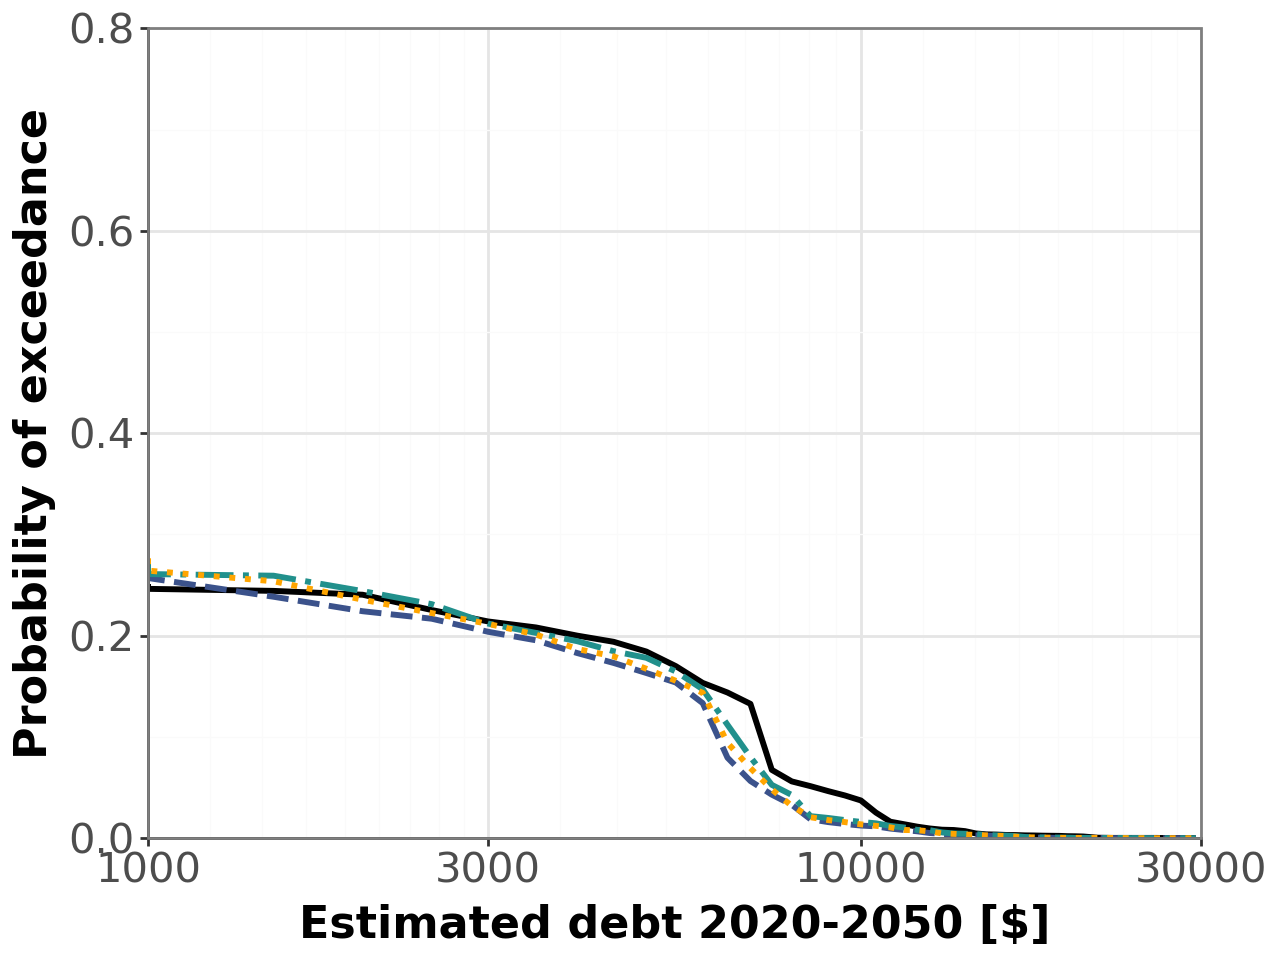

In [ ]:
df_100 = pd.DataFrame()
df_100['Threshold'] = df_100_ND['Threshold']
df_100['Very low'] = df_100_ND['Very low']
df_100['Low'] = df_100_ND['Low']
df_100['Moderate'] = df_100_ND['Moderate']
df_100['High'] = df_100_ND['High']

df_100_long = pd.melt(df_100,id_vars=['Threshold'])

plot_base = ggplot(df_100_long,aes(x='Threshold',y='value',color='variable',linetype='variable')) + geom_line(size=1.2)
plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(color=False,linetype=False)+\
            scale_color_manual(values=['black',vir2,vir3,'orange']) +\
            scale_y_continuous(name = 'Probability of exceedance',limits=[0,0.8], expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[1000,30000], expand=[0,0])


ggsave(plot_clean, filename = 'Fig_Exceedance_100_ND.pdf', path = main_dir)

plot_clean

/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: My Drive/Research/2022_FloodsEPA/Results/Fig_Exceedance_100_DD.pdf
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


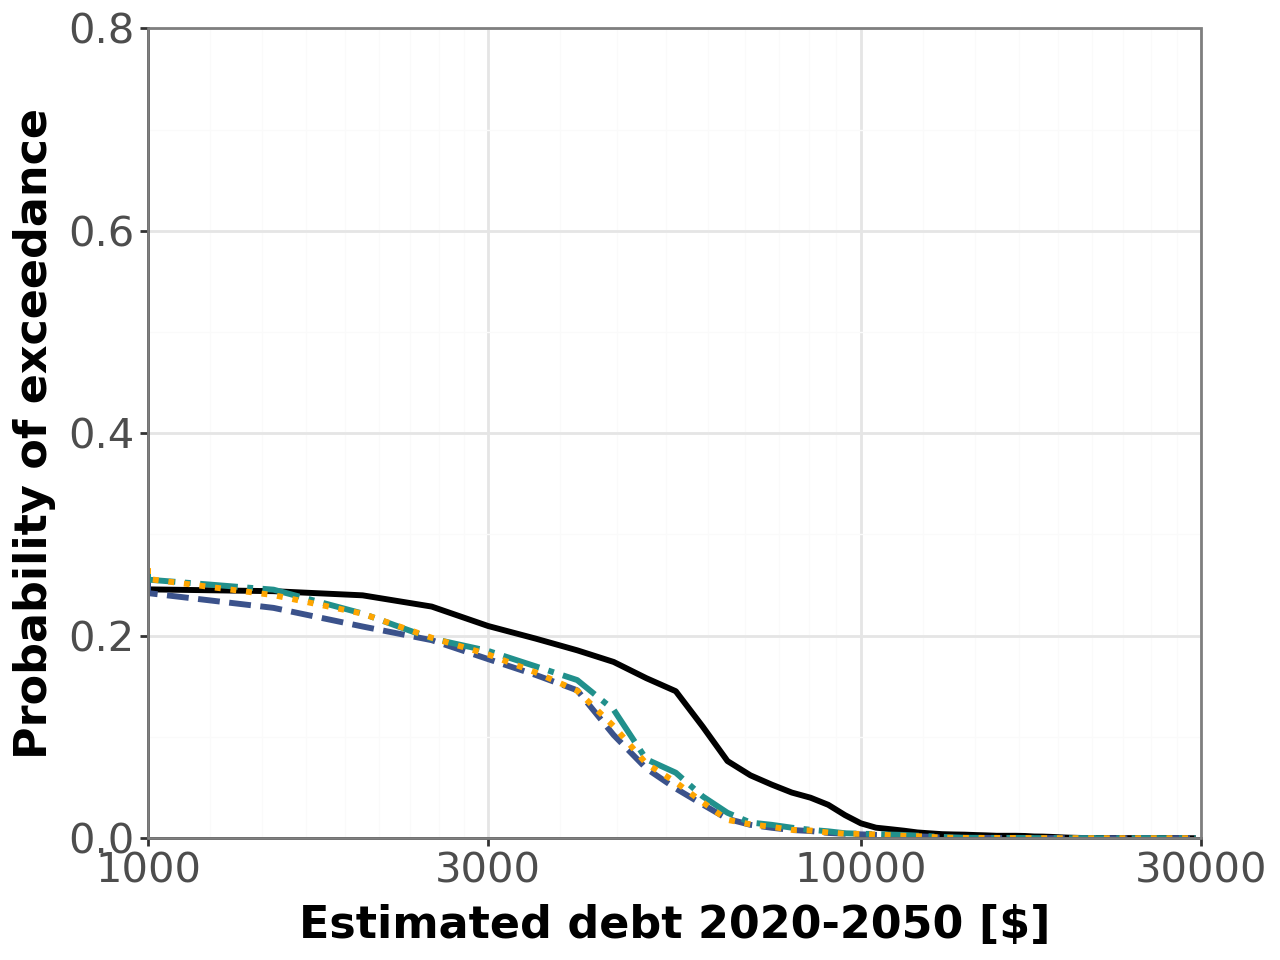

In [ ]:
df_100 = pd.DataFrame()
df_100['Threshold'] = df_100_DD['Threshold']
df_100['Very low'] = df_100_DD['Very low']
df_100['Low'] = df_100_DD['Low']
df_100['Moderate'] = df_100_DD['Moderate']
df_100['High'] = df_100_DD['High']

df_100_long = pd.melt(df_100,id_vars=['Threshold'])

plot_base = ggplot(df_100_long,aes(x='Threshold',y='value',color='variable',linetype='variable')) + geom_line(size=1.2)
plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(color=False,linetype=False)+\
            scale_color_manual(values=['black',vir2,vir3,'orange']) +\
            scale_y_continuous(name = 'Probability of exceedance',limits=[0,0.8], expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[1000,30000], expand=[0,0])

ggsave(plot_clean, filename = 'Fig_Exceedance_100_DD.pdf', path = main_dir)

plot_clean

/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: My Drive/Research/2022_FloodsEPA/Results/Fig_Exceedance_100_CD.pdf
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


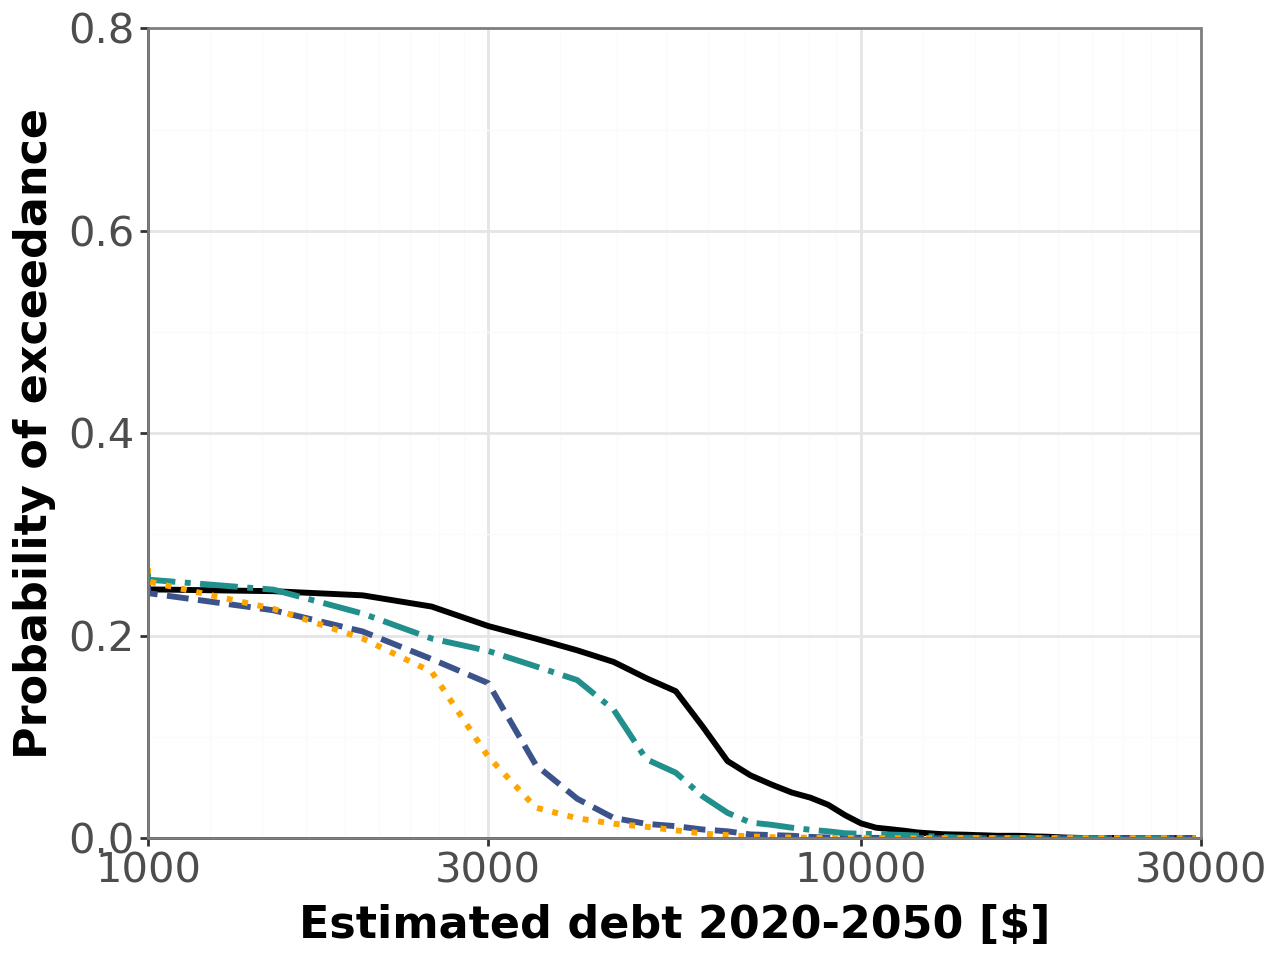

In [ ]:
df_100 = pd.DataFrame()
df_100['Threshold'] = df_100_CD['Threshold']
df_100['Very low'] = df_100_CD['Very low']
df_100['Low'] = df_100_CD['Low']
df_100['Moderate'] = df_100_CD['Moderate']
df_100['High'] = df_100_CD['High']

df_100_long = pd.melt(df_100,id_vars=['Threshold'])

plot_base = ggplot(df_100_long,aes(x='Threshold',y='value',color='variable',linetype='variable')) + geom_line(size=1.2)
plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(color=False,linetype=False)+\
            scale_color_manual(values=['black',vir2,vir3,'orange']) +\
            scale_y_continuous(name = 'Probability of exceedance',limits=[0,0.8], expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[1000,30000], expand=[0,0])

ggsave(plot_clean, filename = 'Fig_Exceedance_100_CD.pdf', path = main_dir)

plot_clean



---



---



# Comparisons: S1

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 27 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 46 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


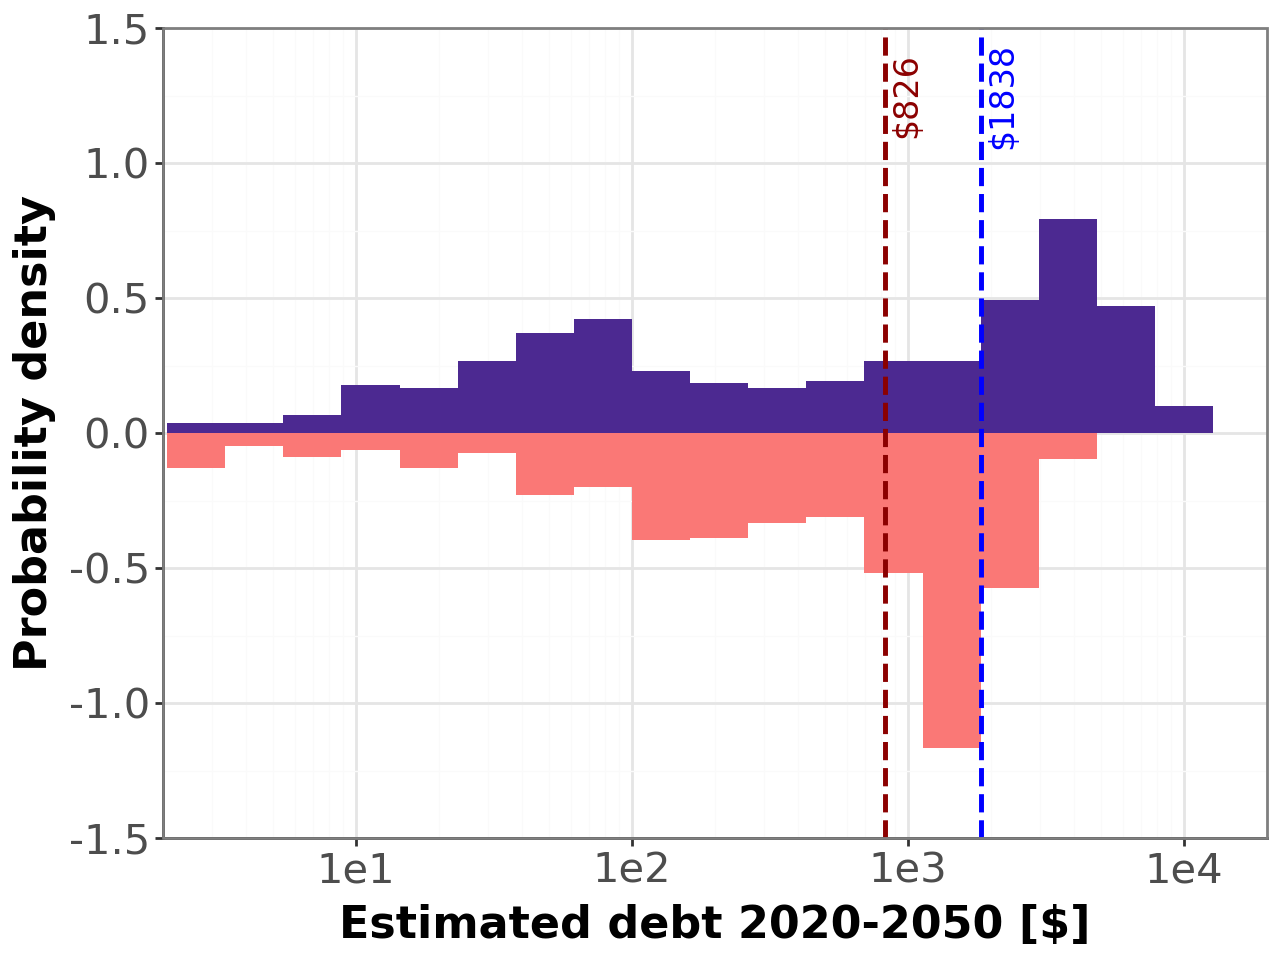

In [ ]:
group = 'Very low'

df_futures_ND_20['sum'] = df_futures_ND_20.loc[:,'R0':'R'+str(nrep-1)].mean(axis=1,skipna=False).astype(float)
df_futures_ND_100['sum'] = df_futures_ND_100.loc[:,'R0':'R'+str(nrep-1)].mean(axis=1,skipna=False).astype(float)

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_ND_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_ND_20['sum']
df_plot['Sum100'] = df_futures_ND_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 21 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 47 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


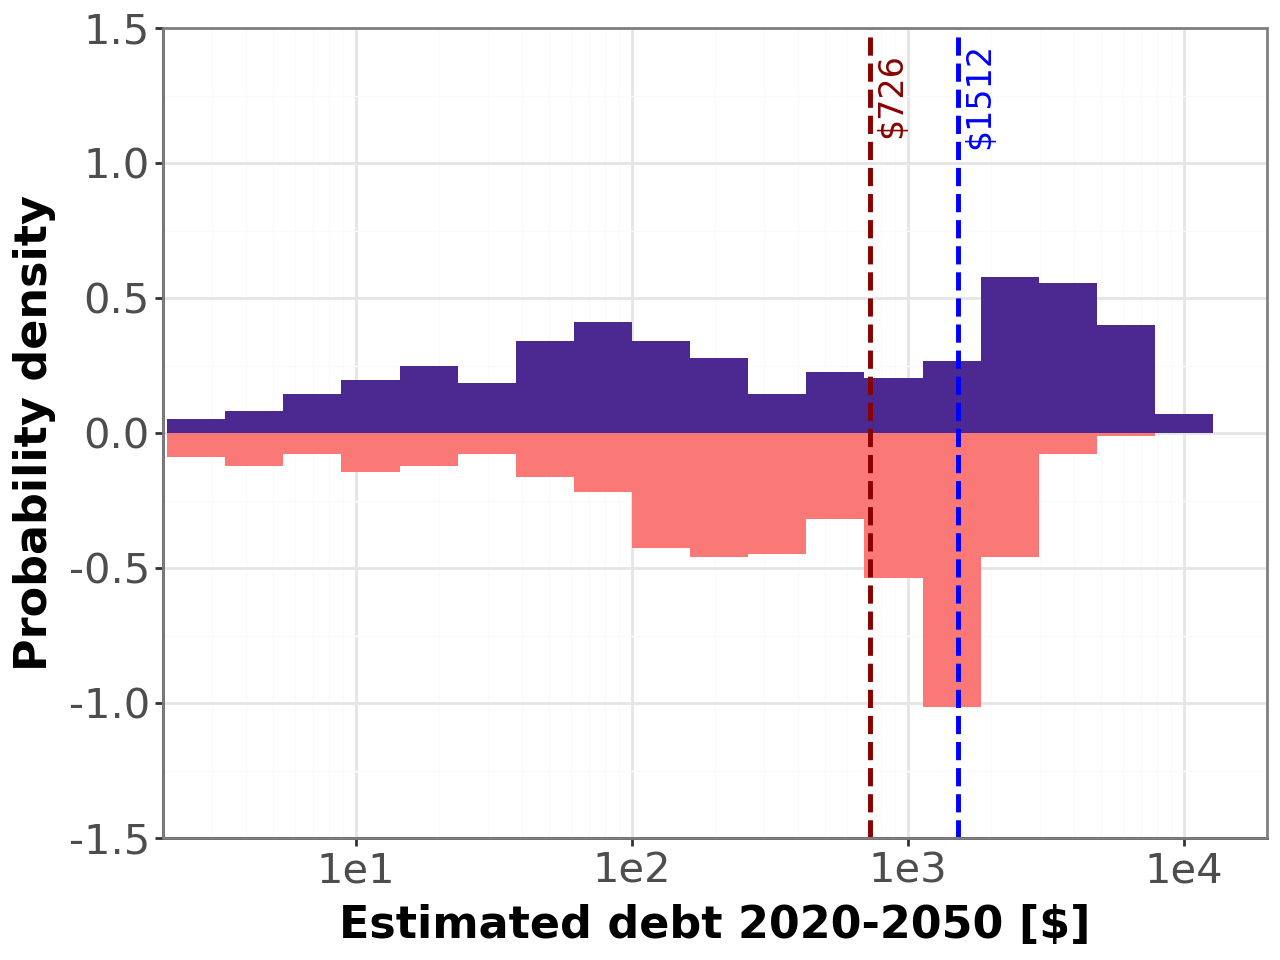

In [ ]:
group = 'Low'

df_futures_ND_20['sum'] = df_futures_ND_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_ND_100['sum'] = df_futures_ND_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_ND_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_ND_20['sum']
df_plot['Sum100'] = df_futures_ND_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 17 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 33 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


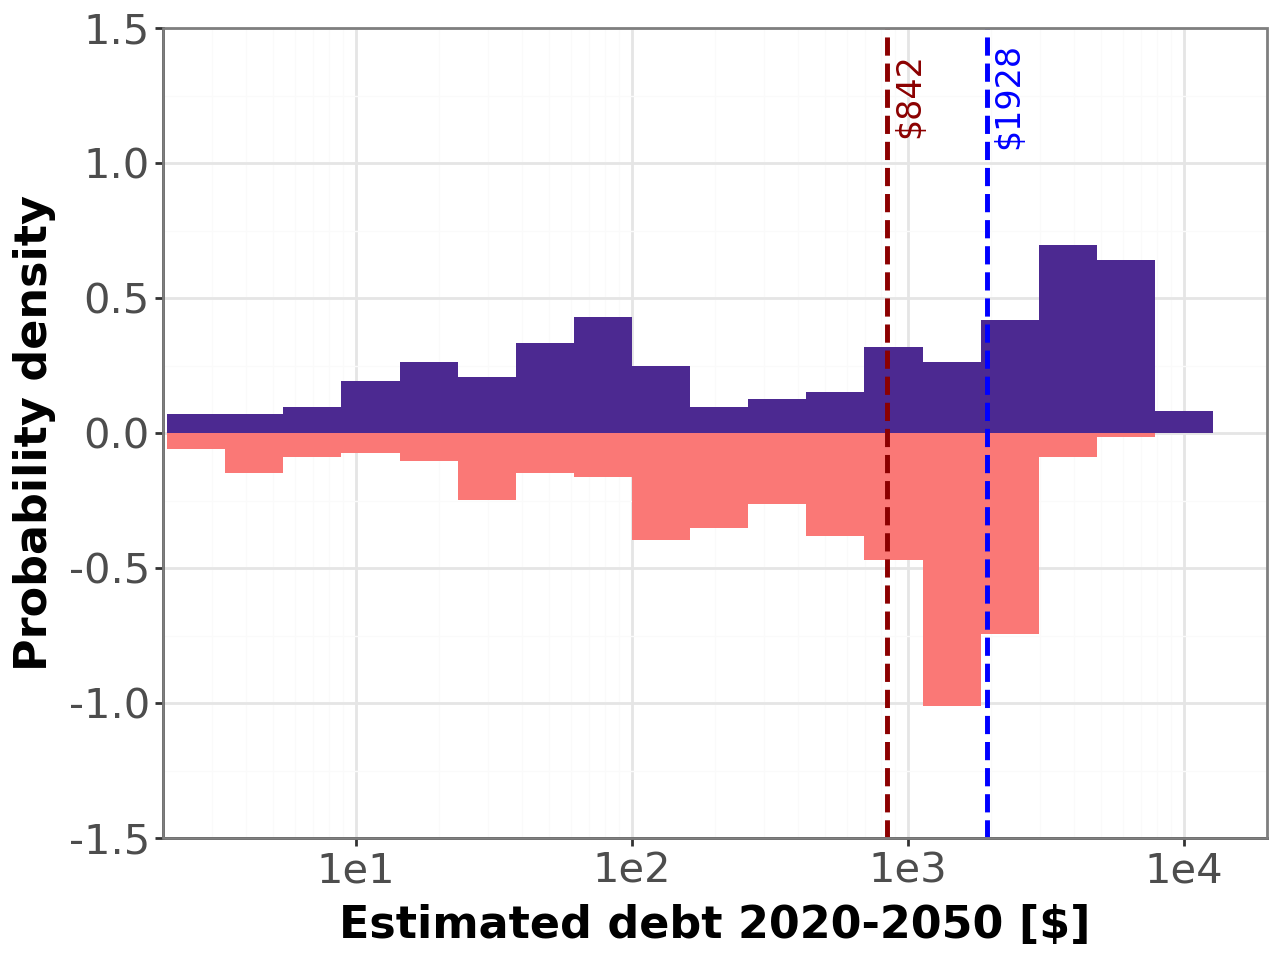

In [ ]:
group = 'Moderate'

df_futures_ND_20['sum'] = df_futures_ND_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_ND_100['sum'] = df_futures_ND_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_ND_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_ND_20['sum']
df_plot['Sum100'] = df_futures_ND_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 13 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 20 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


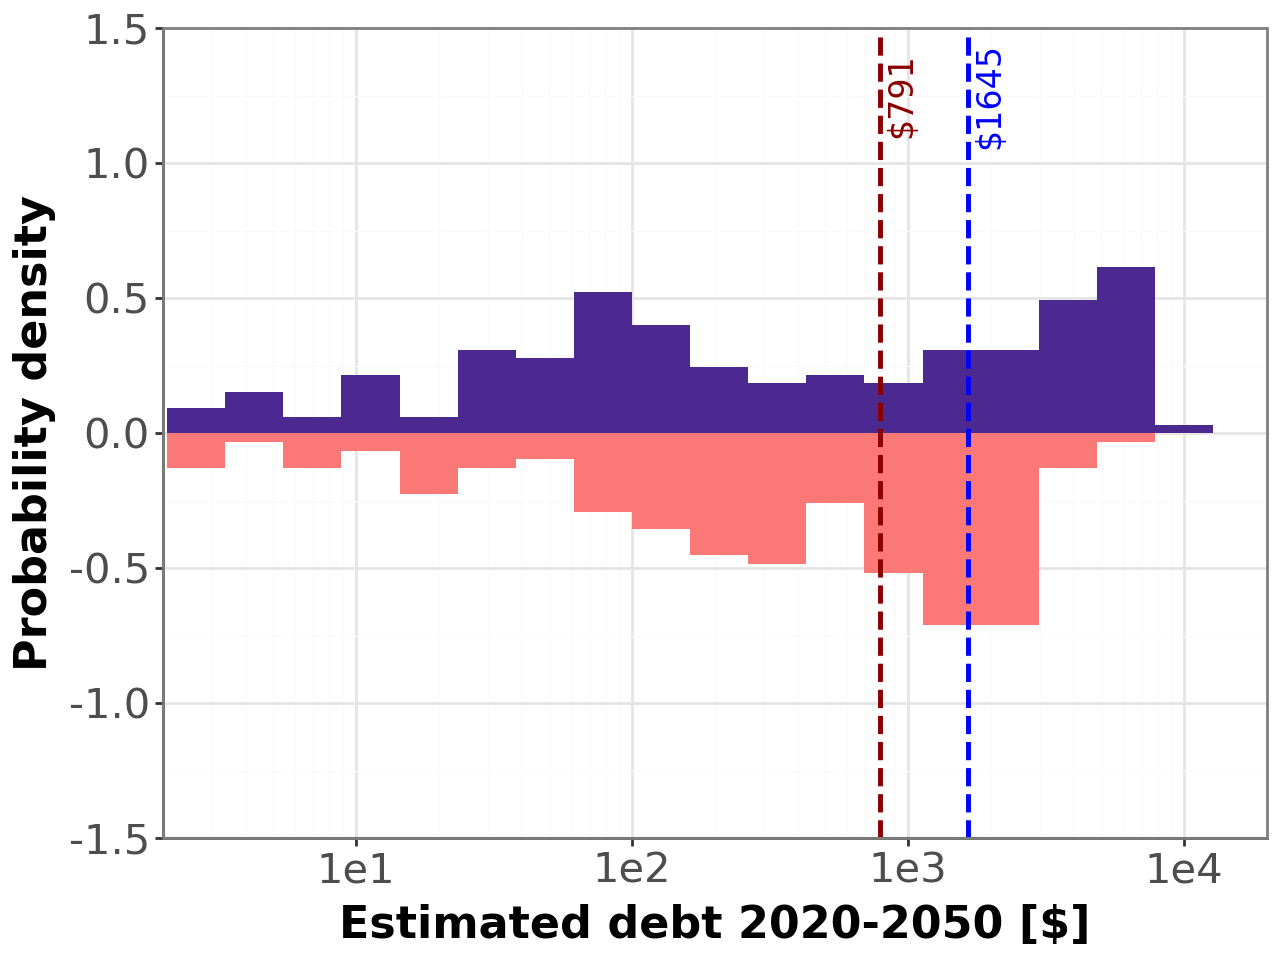

In [ ]:
group = 'High'

df_futures_ND_20['sum'] = df_futures_ND_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_ND_100['sum'] = df_futures_ND_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_ND_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_ND_20['sum']
df_plot['Sum100'] = df_futures_ND_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

# Comparisons: S2

/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/1299192582.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/1299192582.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 42 rows containing non-finite values.
/opt/anac

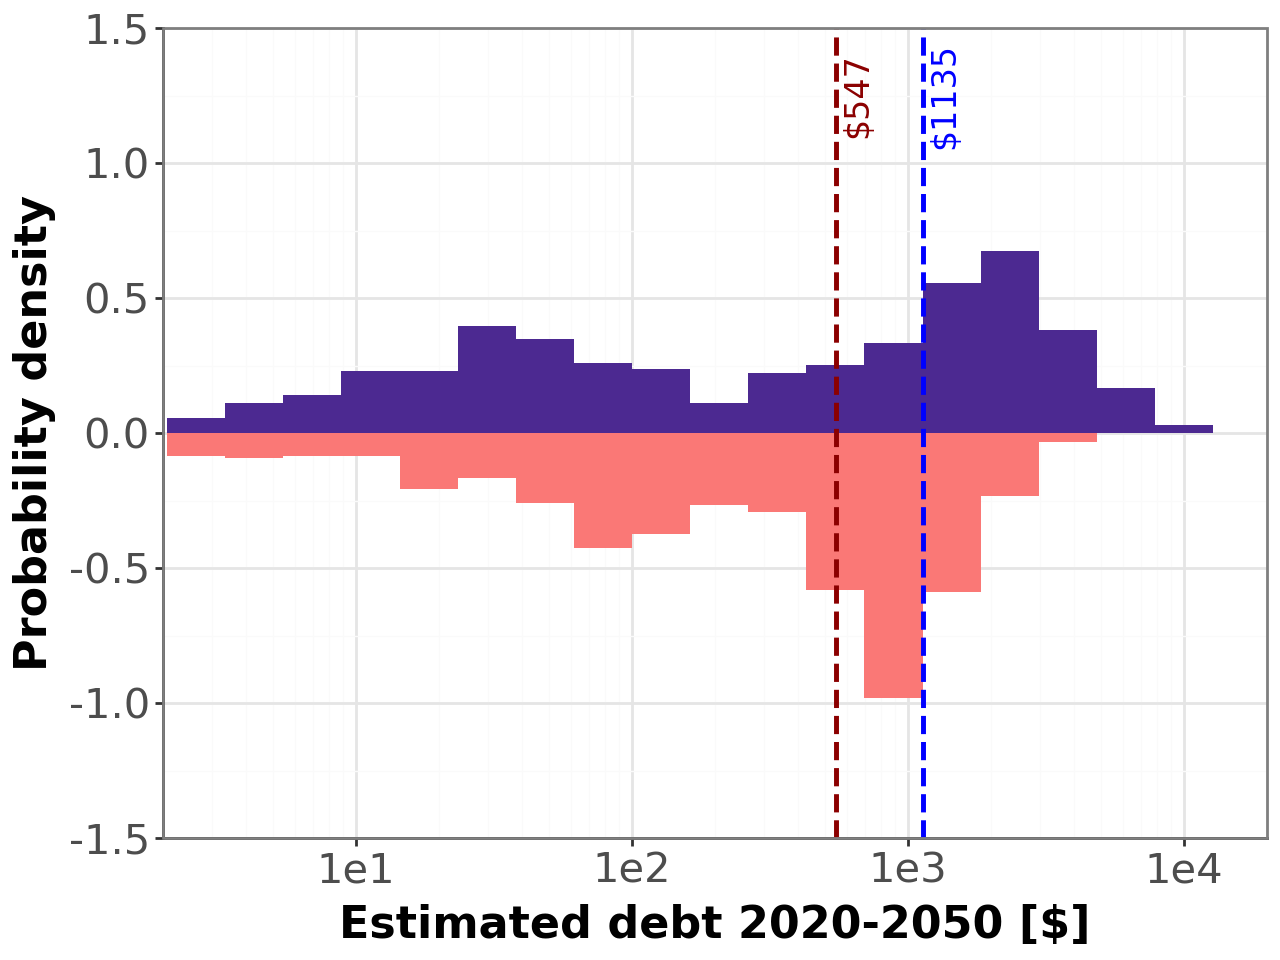

In [ ]:
group = 'Very low'

df_futures_DD_20['sum'] = df_futures_DD_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_DD_100['sum'] = df_futures_DD_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_DD_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_DD_20['sum']
df_plot['Sum100'] = df_futures_DD_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 45 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 65 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


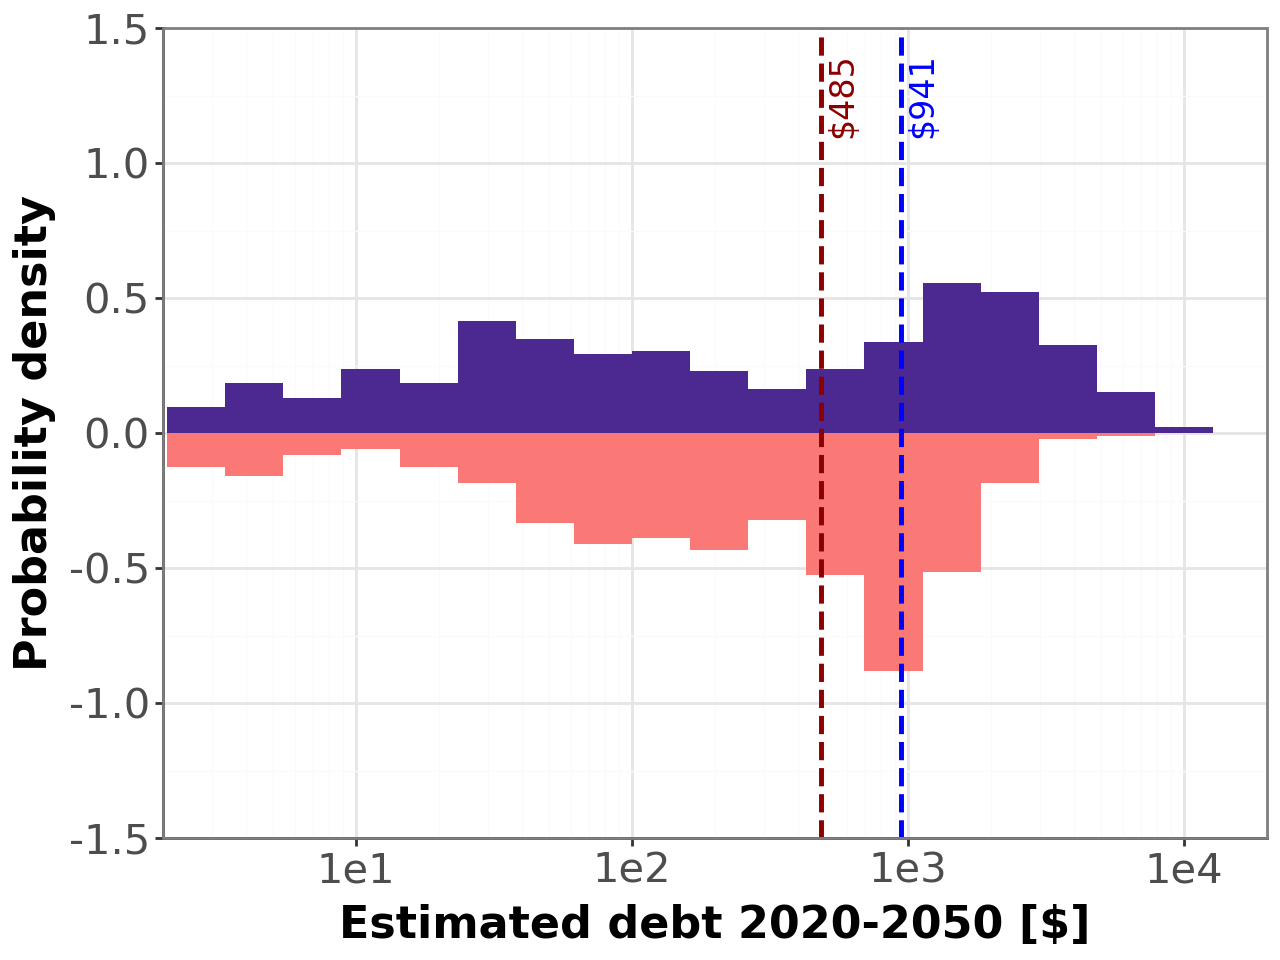

In [ ]:
group = 'Low'

df_futures_DD_20['sum'] = df_futures_DD_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_DD_100['sum'] = df_futures_DD_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_DD_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_DD_20['sum']
df_plot['Sum100'] = df_futures_DD_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 31 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 48 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


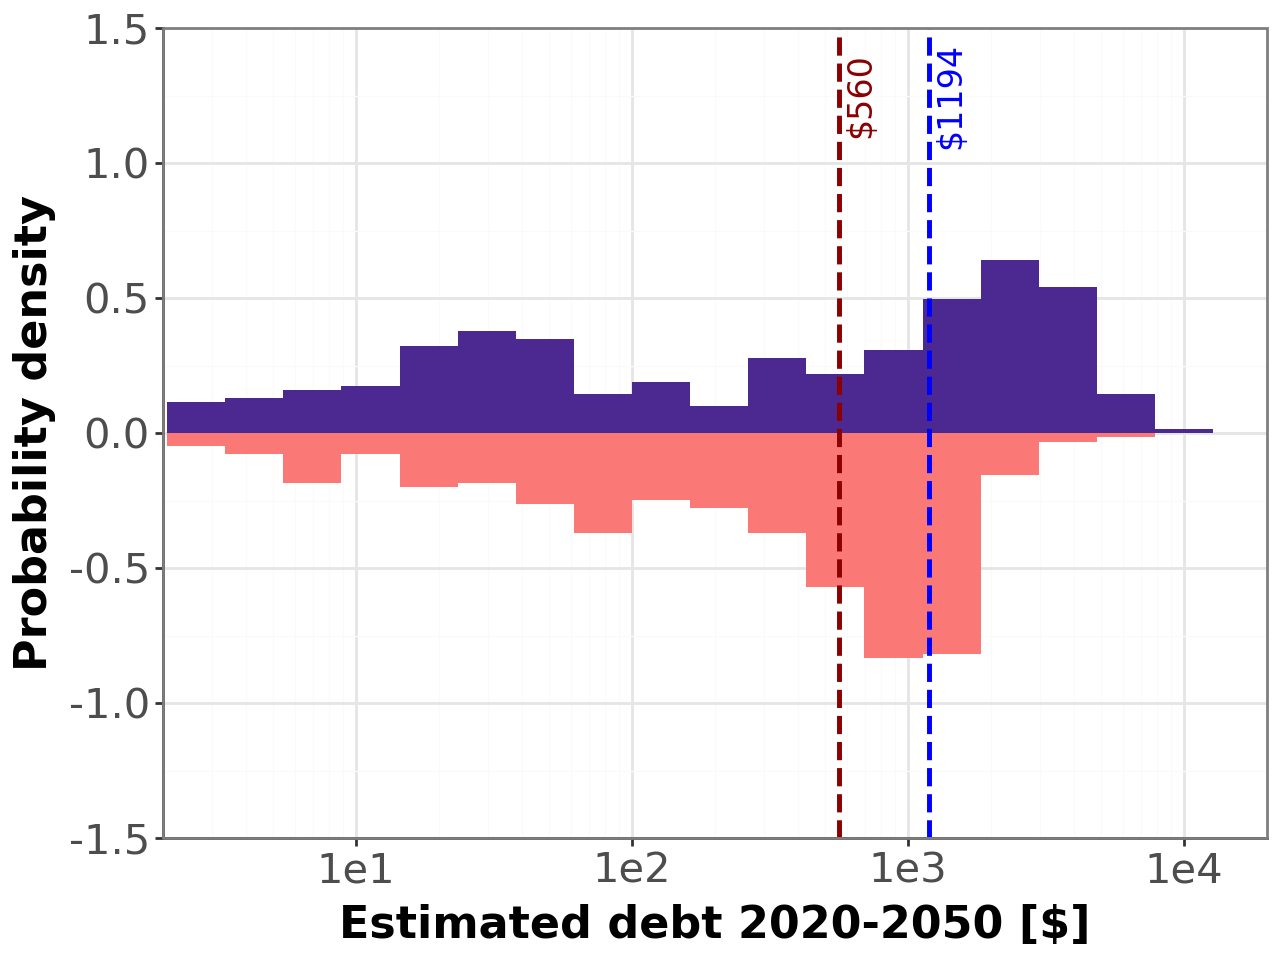

In [ ]:
group = 'Moderate'

df_futures_DD_20['sum'] = df_futures_DD_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_DD_100['sum'] = df_futures_DD_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_DD_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_DD_20['sum']
df_plot['Sum100'] = df_futures_DD_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 17 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 21 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


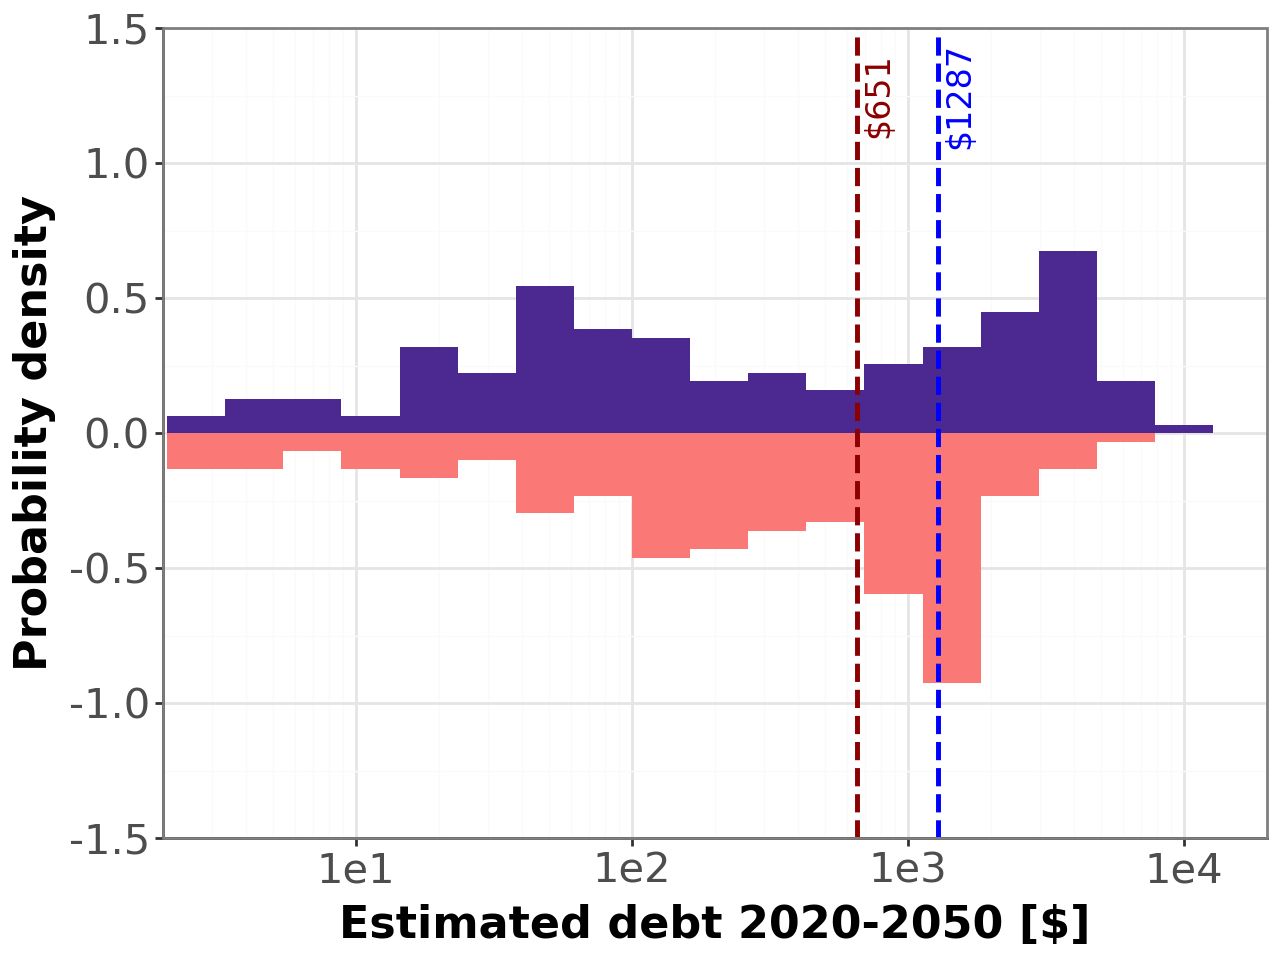

In [ ]:
group = 'High'

df_futures_DD_20['sum'] = df_futures_DD_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_DD_100['sum'] = df_futures_DD_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_DD_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_DD_20['sum']
df_plot['Sum100'] = df_futures_DD_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

# Comparisons: S3

/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/2770641157.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/var/folders/lh/nl6lh2b561dccl267b3w2hzh0000gn/T/ipykernel_43001/2770641157.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 42 rows containing non-finite values.
/opt/anac

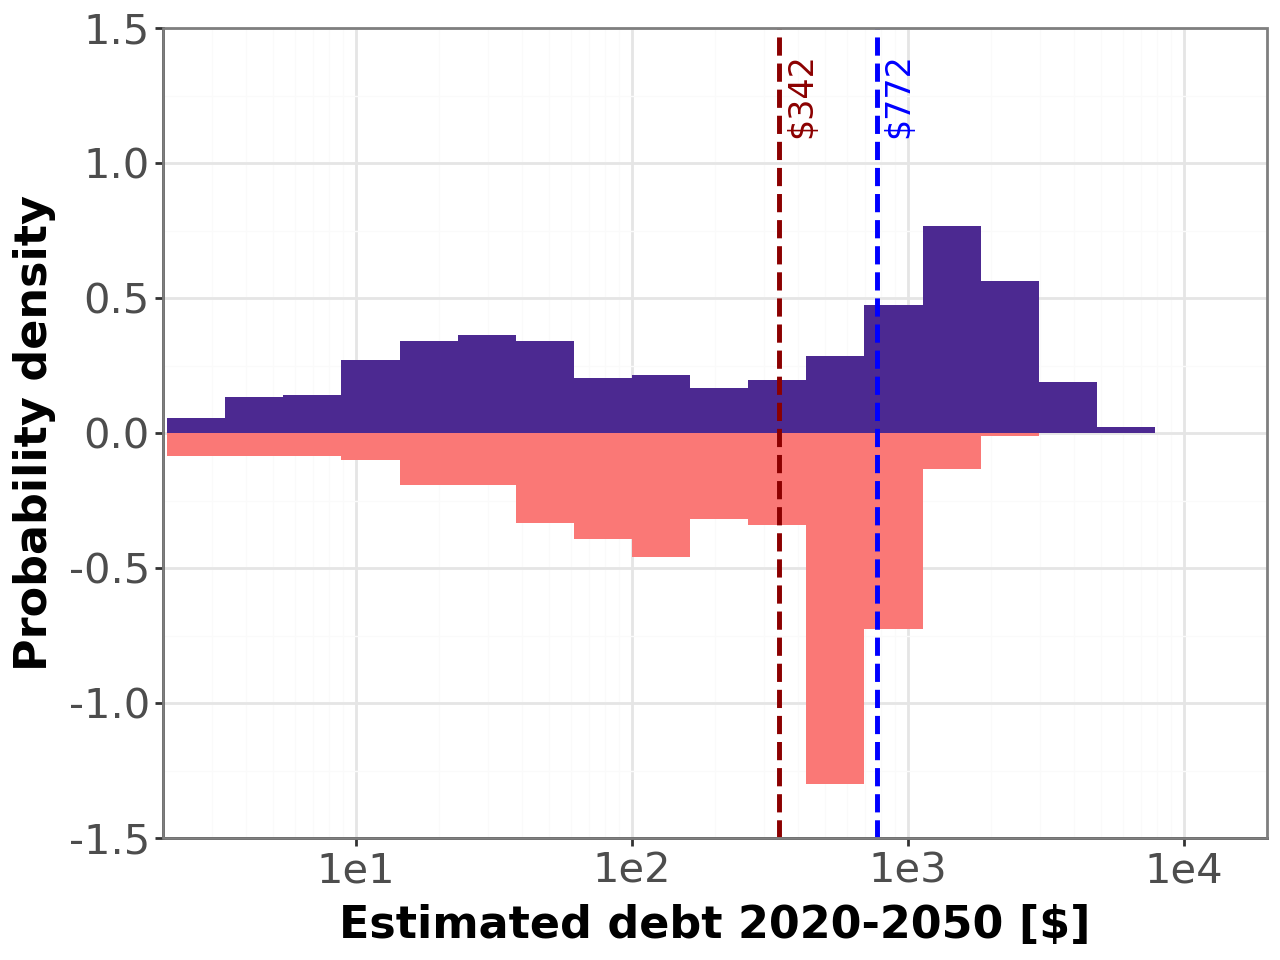

In [ ]:
group = 'Very low'

df_futures_CD_20['sum'] = df_futures_CD_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_CD_100['sum'] = df_futures_CD_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_CD_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_CD_20['sum']
df_plot['Sum100'] = df_futures_CD_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 45 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 65 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


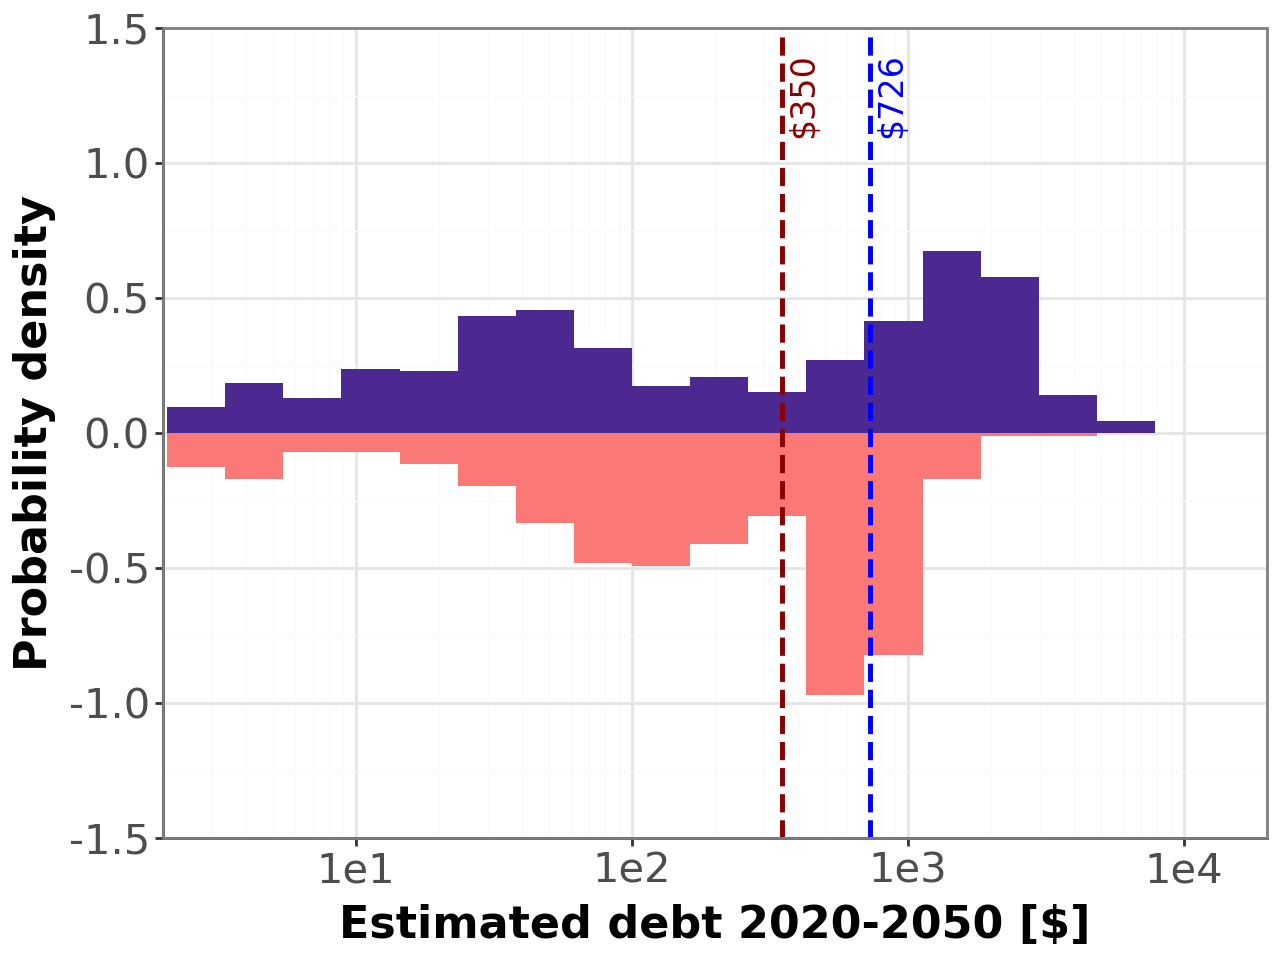

In [ ]:
group = 'Low'

df_futures_CD_20['sum'] = df_futures_CD_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_CD_100['sum'] = df_futures_CD_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_CD_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_CD_20['sum']
df_plot['Sum100'] = df_futures_CD_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 31 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 48 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


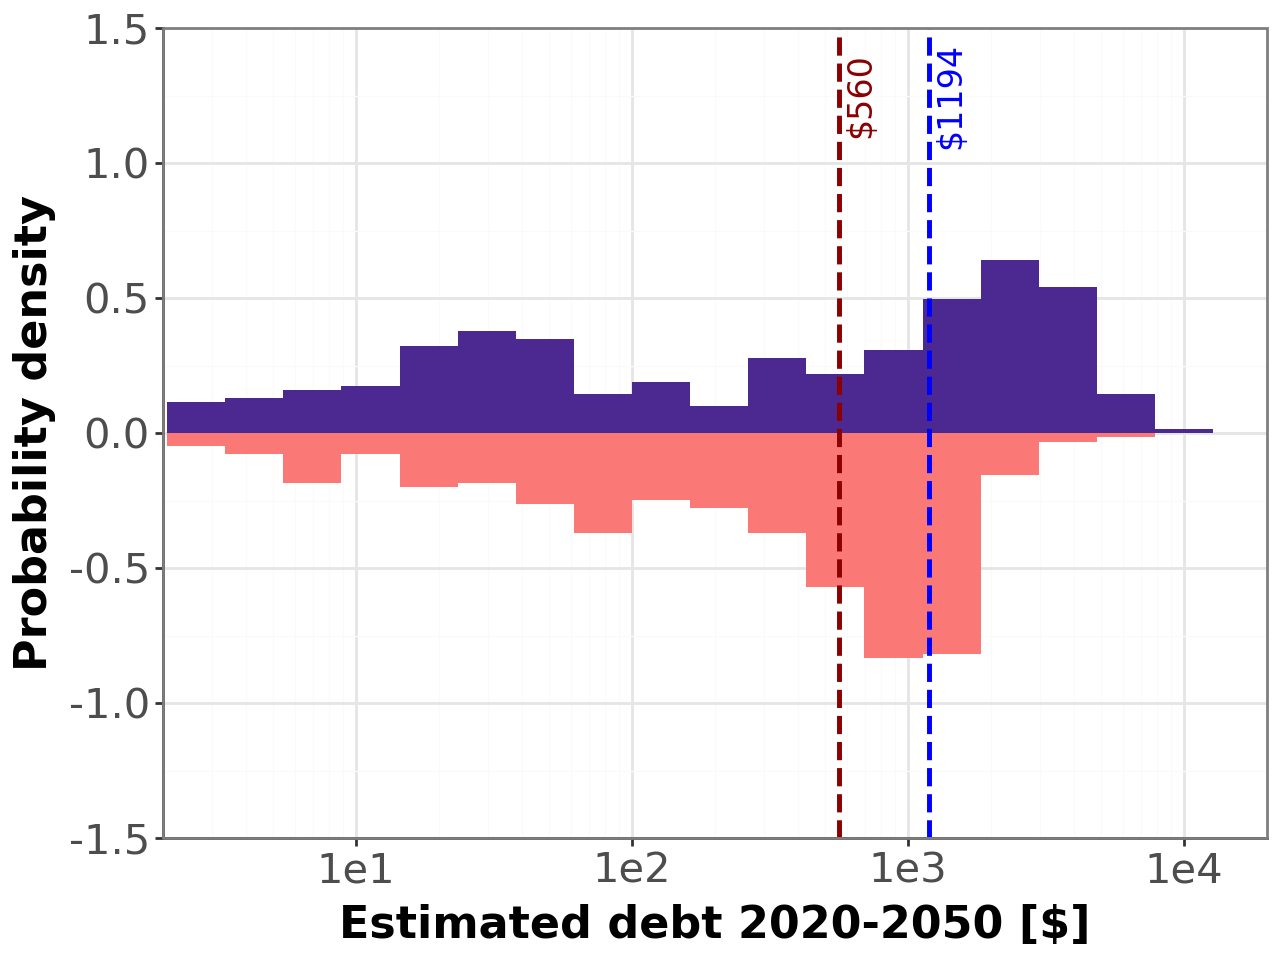

In [ ]:
group = 'Moderate'

df_futures_CD_20['sum'] = df_futures_CD_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_CD_100['sum'] = df_futures_CD_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_CD_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_CD_20['sum']
df_plot['Sum100'] = df_futures_CD_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean

/Users/rcosta/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 17 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 21 rows containing non-finite values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


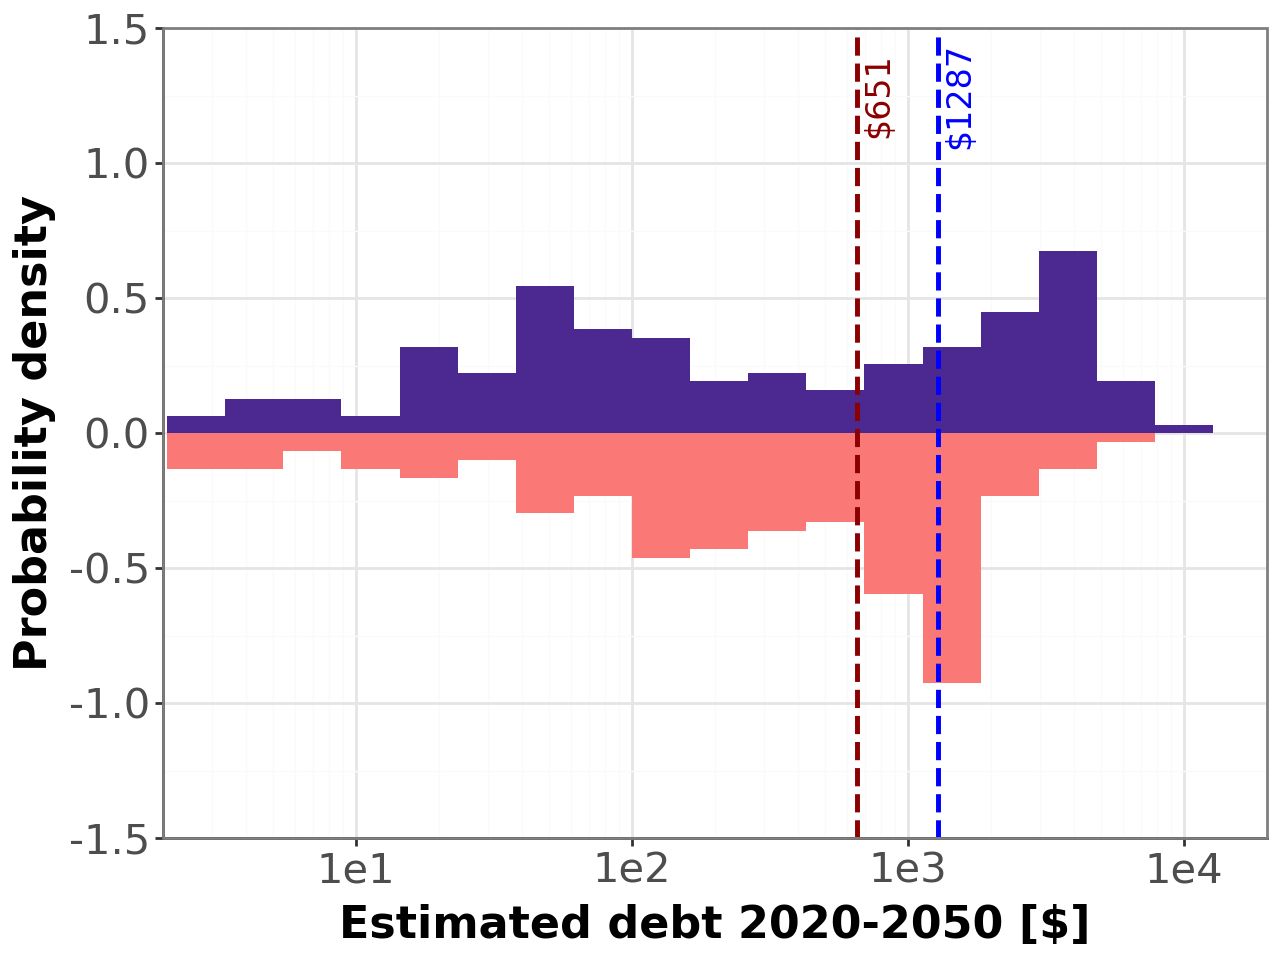

In [ ]:
group = 'High'

df_futures_CD_20['sum'] = df_futures_CD_20.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep
df_futures_CD_100['sum'] = df_futures_CD_100.loc[:,'R0':'R'+str(nrep-1)].sum(axis=1,skipna=True).astype(float) / nrep

df_plot = pd.DataFrame()
df_plot['Tag'] = df_futures_CD_20['Tag']
df_plot['Income'] = df_blds['OwnerIncomeToday']
df_plot['Sum20'] = df_futures_CD_20['sum']
df_plot['Sum100'] = df_futures_CD_100['sum']
df_plot = df_plot[(df_plot['Sum20']!=0) | (df_plot['Sum100']!=0)]

df = pd.melt(df_plot[df_plot['Tag'] == group],id_vars=['Tag','Income'])

median20 = df[df['variable']=='Sum20']['value'].mean()
median100 = df[df['variable']=='Sum100']['value'].mean()

plot_base = ggplot()+\
      geom_histogram(df[df['variable']=='Sum20'],aes(x='value',y='..density..',group='variable',fill='variable'),bins=20)+\
      geom_histogram(df[df['variable']=='Sum100'],aes(x='value',y='-..density..',group='variable',fill='variable'),bins=20)+\
      geom_vline(xintercept = median20,color='blue',linetype='dashed',size=1)+\
      geom_vline(xintercept = median100,color='darkred',linetype='dashed',size=1)+\
      annotate('text', x=1.2*median20, y = 1.25, label=f'${median20:0.0f}',color='blue',angle=90, size=12)+\
      annotate('text', x=1.2*median100, y = 1.25, label=f'${median100:0.0f}',color='darkred',angle=90, size=12)

plot_clean = plot_base + theme_bw() +\
            theme(
            axis_line=element_line(size=1),
            axis_text=element_text(size=15),
            axis_title=element_text(size=16,face="bold"),
            axis_text_x = element_text(angle=0, hjust=2),
            legend_key=element_rect(color = 'white'),
            legend_key_width=35,
            legend_text=element_text(size=12),
            legend_direction = 'vertical',
            legend_background = element_rect(colour = 'black',alpha=0.5),
            ) +\
            guides(fill=False,linetype=False)+\
            scale_fill_manual(values=[color_sunset_0,color_sunset_2]) +\
            scale_y_continuous(name = 'Probability density',limits=[-1.5,1.5],expand=[0,0]) +\
            scale_x_log10(name = 'Estimated debt 2020-2050 [$]',limits=[2,20000],expand=[0,0])
plot_clean



---



---



# T-tests

In [ ]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

In [17]:
def getTStatistics(df):
    df_realestate = df
    df_realestate = df_realestate.replace(0,np.nan)
    # print('count:',(df_realestate > 0).sum().median())
    # print('median:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).median(skipna=True))
    # print('mean:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).mean(skipna=True))
    # print('std:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).std(skipna=True))
    # print('sum:',df_realestate.sum(axis=0,skipna=True).median(skipna=True))
    return  df_realestate.median(axis=0,skipna=True).dropna()

## Losses

In [18]:
# 2020 20
scenario = '2020_20'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'+scenario+'/'
df_realestate = pd.read_csv(the_dir + 'RealEstate.csv',header=None).multiply(cpi.inflate(1,2017,to=theReferenceYear))
df_realestate = df_realestate.replace(0,np.nan)
print('count:',(df_realestate > 0).sum().median())
print('median:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).median(skipna=True))
print('mean:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).mean(skipna=True))
print('std:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).std(skipna=True))
print('sum:',df_realestate.sum(axis=0,skipna=True).median(skipna=True))
s2020_20 = df_realestate.median(axis=0,skipna=True).dropna()

count: 116.5
median: 25057.883074776088
mean: 30744.527714426727
std: 19313.32484919756
sum: 2905917.4722595485


In [19]:
# 2020 100
scenario = '2020_100'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'+scenario+'/'
df_realestate = pd.read_csv(the_dir + 'RealEstate.csv',header=None).multiply(cpi.inflate(1,2017,to=theReferenceYear))
df_realestate = df_realestate.replace(0,np.nan)
print('count:',(df_realestate > 0).sum().median())
print('median:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).median(skipna=True))
print('mean:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).mean(skipna=True))
print('std:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).std(skipna=True))
print('sum:',df_realestate.sum(axis=0,skipna=True).median(skipna=True))
s2020_100 = df_realestate.median(axis=0,skipna=True).dropna()

count: 397.0
median: 36379.0845819762
mean: 40701.25104261898
std: 24745.490570682654
sum: 16265877.241413798


In [20]:
# 2050 20 2
scenario = '2050_20_2'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'+scenario+'/'
df_realestate = pd.read_csv(the_dir + 'RealEstate.csv',header=None).multiply(cpi.inflate(1,2017,to=theReferenceYear))
df_realestate = df_realestate.replace(0,np.nan)
print('count:',(df_realestate > 0).sum().median())
print('median:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).median(skipna=True))
print('mean:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).mean(skipna=True))
print('std:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).std(skipna=True))
print('sum:',df_realestate.sum(axis=0,skipna=True).median(skipna=True))
s2050_20_2 = df_realestate.median(axis=0,skipna=True).dropna()

count: 603.5
median: 65901.42068269248
mean: 57701.059717285396
std: 32524.173347650525
sum: 42115130.84878671


In [21]:
# 2050 100 2
scenario = '2050_100_2'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'+scenario+'/'
df_realestate = pd.read_csv(the_dir + 'RealEstate.csv',header=None).multiply(cpi.inflate(1,2017,to=theReferenceYear))
df_realestate = df_realestate.replace(0,np.nan)
print('count:',(df_realestate > 0).sum().median())
print('median:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).median(skipna=True))
print('mean:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).mean(skipna=True))
print('std:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).std(skipna=True))
print('sum:',df_realestate.sum(axis=0,skipna=True).median(skipna=True))
s2050_100_2 = df_realestate.median(axis=0,skipna=True).dropna()

count: 862.0
median: 92000.79307459001
mean: 94526.14490327788
std: 15889.921146182043
sum: 82099670.18933985


In [22]:
# 2050 20 5
scenario = '2050_20_5'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'+scenario+'/'
df_realestate = pd.read_csv(the_dir + 'RealEstate.csv',header=None).multiply(cpi.inflate(1,2017,to=theReferenceYear))
df_realestate = df_realestate.replace(0,np.nan)
print('count:',(df_realestate > 0).sum().median())
print('median:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).median(skipna=True))
print('mean:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).mean(skipna=True))
print('std:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).std(skipna=True))
print('sum:',df_realestate.sum(axis=0,skipna=True).median(skipna=True))
s2050_20_5 = df_realestate.median(axis=0,skipna=True).dropna()

count: 602.5
median: 65474.56998506989
mean: 57893.99683279404
std: 32799.71745476098
sum: 41753352.06169501


In [23]:
# 2050 100 5
scenario = '2050_100_5'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'+scenario+'/'
df_realestate = pd.read_csv(the_dir + 'RealEstate.csv',header=None).multiply(cpi.inflate(1,2017,to=theReferenceYear))
df_realestate = df_realestate.replace(0,np.nan)
print('count:',(df_realestate > 0).sum().median())
print('median:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).median(skipna=True))
print('mean:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).mean(skipna=True))
print('std:',df_realestate.median(axis=0,skipna=True).replace(0,np.nan).std(skipna=True))
print('sum:',df_realestate.sum(axis=0,skipna=True).median(skipna=True))
s2050_100_5 = df_realestate.median(axis=0,skipna=True).dropna()

count: 870.0
median: 92535.9987237915
mean: 95729.54928221044
std: 15640.391092044198
sum: 83519859.61156952


In [24]:
t_stat, p_value = ttest_ind(s2050_20_2, s2050_20_5)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  -0.13195326542556712
P-Value:  0.8950345698221034


In [25]:
t_stat, p_value = ttest_ind(s2050_100_2, s2050_100_5)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  -1.7068081741045984
P-Value:  0.0880130951148353


In [26]:
t_stat, p_value = ttest_ind(s2020_20, s2050_20_2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  -22.48806909960582
P-Value:  5.535544136214339e-100


## Loans

In [27]:
# 2020 20 ND vs DD
scenario = '2020_20_ND'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_ND = getTStatistics(df)

scenario = '2050_20_2_ND'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_DD = getTStatistics(df)

t_stat, p_value = ttest_ind(d_ND, d_DD)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  -22.88881585670216
P-Value:  3.9772853636546917e-103




---



In [28]:
# 2020 20 ND vs DD
scenario = '2020_20_ND'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_ND = getTStatistics(df)

scenario = '2020_20_DD'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_DD = getTStatistics(df)

t_stat, p_value = ttest_ind(d_ND, d_DD)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  14.894379661006637
P-Value:  1.3493702801305624e-47


In [29]:
# 2020 100 ND vs DD
scenario = '2020_100_ND'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_ND = getTStatistics(df)

scenario = '2020_100_DD'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_DD = getTStatistics(df)

t_stat, p_value = ttest_ind(d_ND, d_DD)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  17.189494565979476
P-Value:  8.811141224326839e-62


In [30]:
# 2050 20 2 ND vs DD
scenario = '2050_20_2_ND'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_ND = getTStatistics(df)

scenario = '2050_20_2_DD'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_DD = getTStatistics(df)

t_stat, p_value = ttest_ind(d_ND, d_DD)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  17.656505439862315
P-Value:  6.851637034511377e-65


In [31]:
# 2050 100 2 ND vs DD
scenario = '2050_100_2_ND'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_ND = getTStatistics(df)

scenario = '2050_100_2_DD'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_Debt_' + scenario + '.txt',header=0)
d_DD = getTStatistics(df)

t_stat, p_value = ttest_ind(d_ND, d_DD)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value)

T-statistic value:  53.73261713047804
P-Value:  0.0


## UHN

In [ ]:
var = 'UHN'

In [ ]:
# SL1 = 20 years, no SLR
scenario = '2020_20'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_LossLoanUHN_' + scenario + '.txt',header=0)

print(var)
l1 = df[(df['Tag']=='Yes') & (df['variable'] == var)]['value'].dropna()
l2 = df[(df['Tag']=='Yes + CDBGDR') & (df['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

UHN
T-statistic value:  16.742235784484663
P-Value:  5.573997877729379e-59 



In [ ]:
# SL2 = 100 years, no SLR
scenario = '2020_100'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_LossLoanUHN_' + scenario + '.txt',header=0)

print(var)
l1 = df[(df['Tag']=='Yes') & (df['variable'] == var)]['value'].dropna()
l2 = df[(df['Tag']=='Yes + CDBGDR') & (df['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

UHN
T-statistic value:  20.66593698599548
P-Value:  3.8111873111270275e-86 



In [ ]:
# SL3 = 20 years, with SLR
scenario = '2050_20_2'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_LossLoanUHN_' + scenario + '.txt',header=0)

print(var)
l1 = df[(df['Tag']=='Yes') & (df['variable'] == var)]['value'].dropna()
l2 = df[(df['Tag']=='Yes + CDBGDR') & (df['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

UHN
T-statistic value:  19.772247376461028
P-Value:  1.291405232497398e-79 



In [ ]:
# SL4 = 100 years, with SLR
scenario = '2050_100_2'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/'
df = pd.read_csv(the_dir + 'df_LossLoanUHN_' + scenario + '.txt',header=0)

print(var)
l1 = df[(df['Tag']=='Yes') & (df['variable'] == var)]['value'].dropna()
l2 = df[(df['Tag']=='Yes + CDBGDR') & (df['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

UHN
T-statistic value:  41.572873419304365
P-Value:  1.0140822210012999e-272 



## Consumption

In [ ]:
# SL1 = 20 years, no SLR
scenario = '2020_20'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/' + scenario
df1 = pd.read_csv(the_dir + '/df_Consumption.txt',header=0)

var = 'Very low'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

var = 'Low'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

var = 'Moderate'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')


var = 'High'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

Very low
T-statistic value:  9.656921776210991
P-Value:  1.4852779289546699e-21 

Low
T-statistic value:  4.943613233609035
P-Value:  8.394286903219227e-07 

Moderate
T-statistic value:  -0.0121722860252198
P-Value:  0.9902895059061516 

High
T-statistic value:  -0.005309791365608342
P-Value:  0.9957641818250771 



In [ ]:
# SL2 = 100 years, no SLR
scenario = '2020_100'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/' + scenario
df1 = pd.read_csv(the_dir + '/df_Consumption.txt',header=0)

var = 'Very low'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

var = 'Low'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

var = 'Moderate'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')


var = 'High'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

Very low
T-statistic value:  13.003608533025524
P-Value:  4.7577206426444624e-37 

Low
T-statistic value:  7.292984410166791
P-Value:  4.514773535771152e-13 

Moderate
T-statistic value:  0.012375021323743223
P-Value:  0.9901277514857578 

High
T-statistic value:  0.0067682728358443274
P-Value:  0.9946006146158248 



In [ ]:
# SL3 = 20 years, with SLR
scenario = '2050_20_2'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/' + scenario
df1 = pd.read_csv(the_dir + '/df_Consumption.txt',header=0)

var = 'Very low'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

var = 'Low'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

var = 'Moderate'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')


var = 'High'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

Very low
T-statistic value:  17.043082766831354
P-Value:  9.337656614010023e-61 

Low
T-statistic value:  11.099427765642865
P-Value:  8.88192275943422e-28 

Moderate
T-statistic value:  -0.017722440243336447
P-Value:  0.9858621249152189 

High
T-statistic value:  -0.014201878396401229
P-Value:  0.9886705790561993 



In [ ]:
# SL4 = 100 years, with SLR
scenario = '2050_100_2'
the_dir = 'My Drive/Research/2022_FloodsEPA/Results/' + scenario
df1 = pd.read_csv(the_dir + '/df_Consumption.txt',header=0)

var = 'Very low'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

var = 'Low'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

var = 'Moderate'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')


var = 'High'
print(var)
l1 = df1[(df1['Tag']=='Yes') & (df1['variable'] == var)]['value'].dropna()
l2 = df1[(df1['Tag']=='Yes + CDBGDR') & (df1['variable'] == var)]['value'].dropna()

t_stat, p_value = ttest_ind(l1, l2)
print('T-statistic value: ', t_stat)
print('P-Value: ', p_value, '\n')

Very low
T-statistic value:  64.4627803715188
P-Value:  0.0 

Low
T-statistic value:  45.17544056717173
P-Value:  2.7275015791871524e-307 

Moderate
T-statistic value:  0.03338135709774263
P-Value:  0.9733738189099999 

High
T-statistic value:  0.04578684065835254
P-Value:  0.963484771689622 

